This idea is inspired by "The mystery of the quantum cakes" by P.G. Kwiat and L. Hardy\
https://www.researchgate.net/publication/251332133_The_mystery_of_the_quantum_cakes

I will define A quantum cake tasting bad as the eigenstate $|0\rangle$ and a quantum state tasting good as $1\rangle$

By algebraicly rearanging terms in the equation relating B and G to N and R in the paper, it is easy to show that
$$|R\rangle = \frac{\sqrt{3}}{\sqrt{5}}|0\rangle + \frac{\sqrt{2}}{\sqrt{5}}|1\rangle$$
$$|N\rangle = \frac{\sqrt{2}}{\sqrt{5}}|0\rangle - \frac{\sqrt{3}}{\sqrt{5}}|1\rangle$$

To simulate the quantum cakes behavior without creating the circuit for the state: I will create the state
$$|\psi\rangle = \frac{1}{2}|00\rangle - \frac{\sqrt{3}}{\sqrt{8}}|01\rangle - \frac{\sqrt{3}}{\sqrt{8}}|10\rangle$$

In [191]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.extensions import Initialize
from math import sqrt
import numpy as np

# Define the quantum circuit and registers
qr = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qr)

# Define the corrected desired state vector
desired_state = np.array([1/2, -np.sqrt(3/8), -np.sqrt(3/8), 0])

# Initialize the quantum circuit with the desired state
init_gate = Initialize(desired_state)
circuit.append(init_gate, [qr[0], qr[1]])

# Simulate the qc to get the final state
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(transpile(circuit, simulator)).result()

# Display the state vector
print("Desired State Vector:")
result.get_statevector().draw('latex')

Desired State Vector:


<IPython.core.display.Latex object>

Simulate 1000 measurements in the cake tasting basis and plot the results

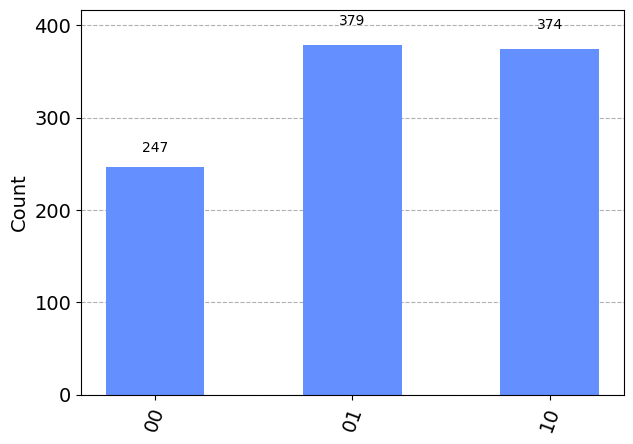

In [192]:
circuit.measure_all()
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(transpile(circuit, simulator), shots = 1000).result()
counts  = result.get_counts()
plot_histogram(counts)

The results are exactly as expected, both cakes never taste good at the same time

Perform measurements in the R, N basis

In [193]:
# Define the quantum circuit and registers
qr = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qr)

# Define the corrected desired state vector
desired_state = np.array([1/2, -np.sqrt(3/8), -np.sqrt(3/8), 0])

# Initialize the quantum circuit with the desired state
init_gate = Initialize(desired_state)
circuit.append(init_gate, [qr[0], qr[1]])

# Define the measurement basis transformation matrices
# |0⟩ in |R⟩ and |N⟩ basis
measurement_R = np.array([[np.sqrt(2/5), -np.sqrt(3/5)],
                          [np.sqrt(3/5), np.sqrt(2/5)]])

measurement_N = np.array([[np.sqrt(2/5), np.sqrt(3/5)],
                          [np.sqrt(3/5), -np.sqrt(2/5)]])

# Perform measurements in the |R⟩ and |N⟩ basis
circuit.unitary(measurement_R, [qr[0]])
circuit.unitary(measurement_N, [qr[1]])

simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(transpile(circuit, simulator), shots = 1000).result()
result.get_statevector().draw('latex')


<IPython.core.display.Latex object>

$|11\rangle$ represents both cakes rising, so once again, the results are as expected because they both rise about 9% of the time

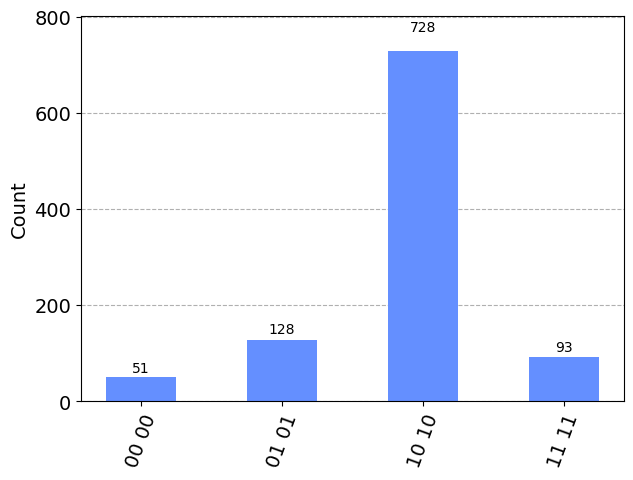

In [195]:

circuit.measure_all()

simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(transpile(circuit, simulator), shots = 1000).result()
counts  = result.get_counts()

plot_histogram(counts)